In [ ]:
# #모델 불러오기
# git clone https://github.com/ultralytics/yolov5

In [1]:
!cd check

������ ��θ� ã�� �� �����ϴ�.


In [2]:
!cd yolov5

In [3]:
pwd

'c:\\Users\\User\\Desktop\\학교\\_3-1\\컴과프\\project\\check'

In [4]:
#요구자료 설치하기
!pip install -r "./yolov5/requirements.txt"

In [5]:
#라이브러리 임포트
import torch
import cv2
import numpy as np
import pathlib
import matplotlib.pyplot as plt
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

# 모델 로드
model_cur = torch.hub.load("./yolov5", "custom", path="best_20240609_0909.pt", source='local' ,force_reload=True)
# model = torch.hub.load("ultralytics/yolov5", "custom", path="best_20240608.pt", force_reload=True)

YOLOv5  v7.0-321-g3742ab49 Python-3.9.19 torch-2.3.1+cpu CPU

Fusing layers... 
YOLOv5x summary: 322 layers, 86348368 parameters, 0 gradients, 204.3 GFLOPs
Adding AutoShape... 


image 1/1: 375x500 4 tree_trunks, 2 parking_meters, 4 bollards
Speed: 8.9ms pre-process, 1920.5ms inference, 10.0ms NMS per image at shape (1, 3, 480, 640)


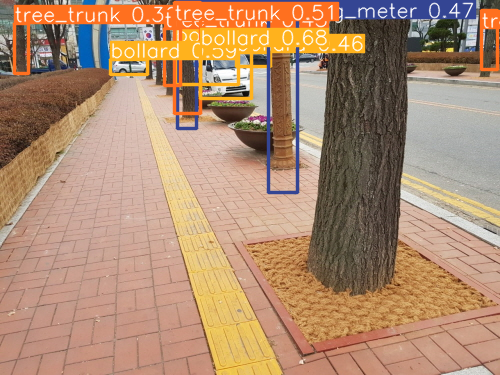

In [6]:
def detect(image_path):
    #이미지 불러오기
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 예측 결과 불러오기
    results = model_cur(img)

    # 결과 출력하기
    results.print()
    results.show()   

    # 이미지 띄우기
    plt.imshow(img)
    plt.show()

# 예시 - 하나의 이미지에서 제대로 작동하는지
detect("./172157_115079_712.jpg")

In [8]:
#비디오 받아오기 or 웹캠 열기
cap = cv2.VideoCapture(0)

#비디오 열기
if cap.isOpened():
    while True:
        ret, frame = cap.read()
        move_cnt = 0
        if not ret:
            break
        #결과 띄우기
        results = model_cur(frame)
        labels = results.names
        for i, det in enumerate(results.xyxy[0]):  #이미지 내에서 감지된 것
            xmin, ymin, xmax, ymax, conf, cls = det
            label = f'{labels[int(cls)]} {conf:.2f}'
            if labels[int(cls)] == "movable_signage": #이동하는 것 확인
                move_cnt += 1
        # 결과 렌더링 하기 - gpt
        frame = np.squeeze(results.render())
        cv2.putText(frame, "Count of moving things!" + " " + str(move_cnt) , (30,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 5)
        cv2.imshow("Image", frame)
        key = cv2.waitKey(1)
        if key == 27:
            break
cap.release()
cv2.destroyAllWindows()
